In [48]:
import imblearn
import numpy as np
import pandas as po
from collections import Counter
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from pandas_profiling import ProfileReport
from imblearn.under_sampling import RandomUnderSampler

In [45]:
from sklearn.metrics import matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
df = po.read_csv('data/ashrae_db2.01.csv', encoding='ISO-8859-1')
df

,Publication (Citation),Data contributor,Year,Season,Koppen climate classification,Climate,City,Country,Building type,Cooling startegy_building level,...,Subject«s height (cm),Subject«s weight (kg),Blind (curtain),Fan,Window,Door,Heater,Outdoor monthly air temperature (¡C),Outdoor monthly air temperature (¡F),Database
0,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,162.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
1,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,154.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
2,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,173.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
3,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,167.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
4,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,178.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107578,"Kwok, A.G. ""Thermal Comfort in Tropical Classr...",Alison Kwok,1996.0,Winter,As,Tropical dry savanna,Honolulu,USA,Classroom,Air Conditioned,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Database 1
107579,"Kwok, A.G. ""Thermal Comfort in Tropical Classr...",Alison Kwok,1996.0,Winter,As,Tropical dry savanna,Honolulu,USA,Classroom,Air Conditioned,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Database 1
107580,"Kwok, A.G. ""Thermal Comfort in Tropical Classr...",Alison Kwok,1996.0,Winter,As,Tropical dry savanna,Honolulu,USA,Classroom,Air Conditioned,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Database 1
107581,"Kwok, A.G. ""Thermal Comfort in Tropical Classr...",Alison Kwok,1996.0,Winter,As,Tropical dry savanna,Honolulu,USA,Classroom,Air Conditioned,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Database 1


In [4]:
#profile = ProfileReport(df, title="Thermal Comfort Profiling Report", explorative=True)

In [5]:
#profile.to_file("data/thermal_comfort_eda.html")

In [6]:
df.columns

Index(['Publication (Citation)', 'Data contributor', 'Year', 'Season',
       'Koppen climate classification', 'Climate', 'City', 'Country',
       'Building type', 'Cooling startegy_building level',
       'Cooling startegy_operation mode for MM buildings',
       'Heating strategy_building level', 'Age', 'Sex', 'Thermal sensation',
       'Thermal sensation acceptability', 'Thermal preference',
       'Air movement acceptability', 'Air movement preference',
       'Thermal comfort', 'PMV', 'PPD', 'SET', 'Clo', 'Met', 'activity_10',
       'activity_20', 'activity_30', 'activity_60', 'Air temperature (¡C)',
       'Air temperature (¡F)', 'Ta_h (¡C)', 'Ta_h (¡F)', 'Ta_m (¡C)',
       'Ta_m (¡F)', 'Ta_l (¡C)', 'Ta_l (¡F)', 'Operative temperature (¡C)',
       'Operative temperature (¡F)', 'Radiant temperature (¡C)',
       'Radiant temperature (¡F)', 'Globe temperature (¡C)',
       'Globe temperature (¡F)', 'Tg_h (¡C)', 'Tg_h (¡F)', 'Tg_m (¡C)',
       'Tg_m (¡F)', 'Tg_l (¡C)', 'Tg_l (

In [7]:
df['Cooling startegy_building level'].value_counts()

Naturally Ventilated       47285
Air Conditioned            32372
Mixed Mode                 26519
Mechanically Ventilated      180
Name: Cooling startegy_building level, dtype: int64

In [8]:
df = df[np.logical_or(df['Cooling startegy_building level'] == 'Air Conditioned', df['Cooling startegy_building level'] == 'Mixed Mode')]

In [9]:
df[['Thermal comfort', 'PMV', 'Thermal sensation']]

,Thermal comfort,PMV,Thermal sensation
0,5,NaN,-0.5
1,5,NaN,-2.1
2,6,NaN,0.5
3,4,NaN,-2.5
4,6,NaN,-0.5
...,...,...,...
107578,5,NaN,-2.1
107579,5,NaN,-0.5
107580,5,NaN,-1.0
107581,4,NaN,1.0


In [10]:
df['Thermal sensation'].value_counts()

 0.0    21881
 1.0     9637
-1.0     9414
 2.0     4448
-2.0     3314
        ...  
 2.8        7
 2.7        6
 2.6        5
 2.9        3
-2.9        3
Name: Thermal sensation, Length: 61, dtype: int64

In [11]:
df['PMV'].value_counts()

 0.10    1790
 0.00    1726
 0.30    1715
 0.20    1703
-0.10    1586
         ... 
 1.21       1
 1.17       1
 1.06       1
 2.01       1
-2.75       1
Name: PMV, Length: 443, dtype: int64

In [12]:
df['Building type'].value_counts()

Office                 44797
Classroom               5783
Others                  4954
Multifamily housing     2536
Senior center            821
Name: Building type, dtype: int64

df = df[['Season', 'Age', 'Sex', 'Thermal comfort', 'PMV', 'Air temperature (¡C)', 'Air temperature (¡F)', 'Ta_h (¡C)', 'Ta_h (¡F)', 'Ta_m (¡C)', 'Ta_m (¡F)', 'Ta_l (¡C)', 'Ta_l (¡F)', 'Operative temperature (¡C)', 'Operative temperature (¡F)', 'Radiant temperature (¡C)', 'Radiant temperature (¡F)', 'Globe temperature (¡C)', 'Globe temperature (¡F)', 'Tg_h (¡C)', 'Tg_h (¡F)', 'Tg_m (¡C)', 'Tg_m (¡F)', 'Tg_l (¡C)', 'Tg_l (¡F)', 'Relative humidity (%)', 'Humidity sensation', 'Air velocity (m/s)', 'Air velocity (fpm)', 'Velocity_h (m/s)', 'Velocity_h (fpm)', 'Velocity_m (m/s)', 'Velocity_m (fpm)', 'Velocity_l (m/s)', 'Velocity_l (fpm)', 'Outdoor monthly air temperature (¡C)', 'Outdoor monthly air temperature (¡F)']]

In [13]:
df = df[['Season', 'Age', 'Sex', 'Thermal sensation', 'PMV', 'Air temperature (¡C)', 'Air temperature (¡F)','Radiant temperature (¡C)', 'Radiant temperature (¡F)', 'Globe temperature (¡C)', 'Globe temperature (¡F)', 'Relative humidity (%)', 'Humidity sensation', 'Air velocity (m/s)', 'Air velocity (fpm)', 'Velocity_h (m/s)', 'Velocity_h (fpm)', 'Velocity_m (m/s)', 'Velocity_m (fpm)', 'Velocity_l (m/s)', 'Velocity_l (fpm)', 'Outdoor monthly air temperature (¡C)', 'Outdoor monthly air temperature (¡F)']]

In [14]:
df = po.concat([df.drop(['Season', 'Sex'], axis=1), po.get_dummies(df[['Season', 'Sex']])], axis=1)

In [15]:
df

,Age,Thermal sensation,PMV,Air temperature (¡C),Air temperature (¡F),Radiant temperature (¡C),Radiant temperature (¡F),Globe temperature (¡C),Globe temperature (¡F),Relative humidity (%),...,Velocity_l (m/s),Velocity_l (fpm),Outdoor monthly air temperature (¡C),Outdoor monthly air temperature (¡F),Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Sex_Female,Sex_Male
0,15.0,-0.5,NaN,24.2,75.6,NaN,NaN,24.0,75.2,50.2,...,NaN,NaN,25.0,77.0,0,0,1,0,1,0
1,15.0,-2.1,NaN,24.2,75.6,NaN,NaN,24.0,75.2,50.2,...,NaN,NaN,25.0,77.0,0,0,1,0,1,0
2,15.0,0.5,NaN,24.2,75.6,NaN,NaN,24.0,75.2,50.2,...,NaN,NaN,25.0,77.0,0,0,1,0,0,1
3,14.0,-2.5,NaN,24.2,75.6,NaN,NaN,24.0,75.2,50.2,...,NaN,NaN,25.0,77.0,0,0,1,0,1,0
4,15.0,-0.5,NaN,24.2,75.6,NaN,NaN,24.0,75.2,50.2,...,NaN,NaN,25.0,77.0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107578,17.0,-2.1,NaN,NaN,NaN,NaN,NaN,22.1,71.8,67.4,...,NaN,NaN,NaN,NaN,0,0,0,1,1,0
107579,15.0,-0.5,NaN,NaN,NaN,NaN,NaN,22.1,71.8,67.4,...,NaN,NaN,NaN,NaN,0,0,0,1,1,0
107580,16.0,-1.0,NaN,NaN,NaN,NaN,NaN,22.1,71.8,67.4,...,NaN,NaN,NaN,NaN,0,0,0,1,1,0
107581,16.0,1.0,NaN,NaN,NaN,NaN,NaN,22.1,71.8,67.4,...,NaN,NaN,NaN,NaN,0,0,0,1,0,1


In [16]:
df.dtypes

Age                                     float64
Thermal sensation                       float64
PMV                                     float64
Air temperature (¡C)                    float64
Air temperature (¡F)                    float64
Radiant temperature (¡C)                float64
Radiant temperature (¡F)                float64
Globe temperature (¡C)                  float64
Globe temperature (¡F)                  float64
Relative humidity (%)                   float64
Humidity sensation                      float64
Air velocity (m/s)                      float64
Air velocity (fpm)                      float64
Velocity_h (m/s)                        float64
Velocity_h (fpm)                        float64
Velocity_m (m/s)                        float64
Velocity_m (fpm)                        float64
Velocity_l (m/s)                        float64
Velocity_l (fpm)                        float64
Outdoor monthly air temperature (¡C)    float64
Outdoor monthly air temperature (¡F)    

In [17]:
#df = df[df['Thermal comfort'] != 'Na']

In [18]:
#df['Thermal comfort'] = df['Thermal comfort'].apply(lambda x: x if type(x) == float else None)

In [19]:
df = df.fillna(value=df.median())

In [20]:
df.astype('float')

,Age,Thermal sensation,PMV,Air temperature (¡C),Air temperature (¡F),Radiant temperature (¡C),Radiant temperature (¡F),Globe temperature (¡C),Globe temperature (¡F),Relative humidity (%),...,Velocity_l (m/s),Velocity_l (fpm),Outdoor monthly air temperature (¡C),Outdoor monthly air temperature (¡F),Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Sex_Female,Sex_Male
0,15.0,-0.5,0.1,24.2,75.6,23.6,74.4,24.0,75.2,50.2,...,0.08,16.54,25.0,77.00,0.0,0.0,1.0,0.0,1.0,0.0
1,15.0,-2.1,0.1,24.2,75.6,23.6,74.4,24.0,75.2,50.2,...,0.08,16.54,25.0,77.00,0.0,0.0,1.0,0.0,1.0,0.0
2,15.0,0.5,0.1,24.2,75.6,23.6,74.4,24.0,75.2,50.2,...,0.08,16.54,25.0,77.00,0.0,0.0,1.0,0.0,0.0,1.0
3,14.0,-2.5,0.1,24.2,75.6,23.6,74.4,24.0,75.2,50.2,...,0.08,16.54,25.0,77.00,0.0,0.0,1.0,0.0,1.0,0.0
4,15.0,-0.5,0.1,24.2,75.6,23.6,74.4,24.0,75.2,50.2,...,0.08,16.54,25.0,77.00,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107578,17.0,-2.1,0.1,23.8,74.9,23.6,74.4,22.1,71.8,67.4,...,0.08,16.54,18.6,65.45,0.0,0.0,0.0,1.0,1.0,0.0
107579,15.0,-0.5,0.1,23.8,74.9,23.6,74.4,22.1,71.8,67.4,...,0.08,16.54,18.6,65.45,0.0,0.0,0.0,1.0,1.0,0.0
107580,16.0,-1.0,0.1,23.8,74.9,23.6,74.4,22.1,71.8,67.4,...,0.08,16.54,18.6,65.45,0.0,0.0,0.0,1.0,1.0,0.0
107581,16.0,1.0,0.1,23.8,74.9,23.6,74.4,22.1,71.8,67.4,...,0.08,16.54,18.6,65.45,0.0,0.0,0.0,1.0,0.0,1.0


In [21]:
df['Thermal sensation'] = df['Thermal sensation'].apply(lambda x: -2 if x <= -2 else x)
df['Thermal sensation'] = df['Thermal sensation'].apply(lambda x: 2 if x >= 2 else x)

In [31]:
# Making it categorical
df['Thermal sensation'] = df['Thermal sensation'].apply(lambda x: np.round(x))

(array([ 5023.,     0., 10059.,     0.,     0., 26551.,     0., 10248.,
            0.,  7010.]),
 array([-2. , -1.6, -1.2, -0.8, -0.4,  0. ,  0.4,  0.8,  1.2,  1.6,  2. ]),
 <a list of 10 Patch objects>)

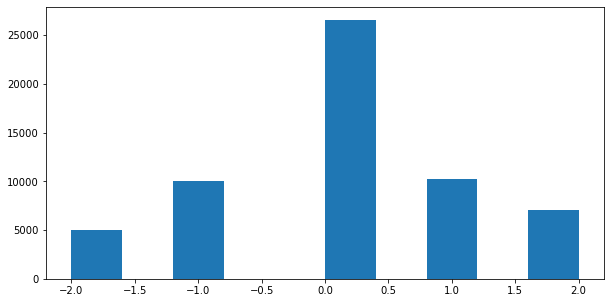

In [33]:
plt.figure(figsize=(10, 5))
plt.hist(df['Thermal sensation'])

In [34]:
df.to_csv('data/ahrae_processed.csv', index=False)

In [35]:
X = df.drop('Thermal sensation', axis=1)
y = df['Thermal sensation']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
regr = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)

In [43]:
y_pred = regr.predict(X_test)

In [46]:
matthews_corrcoef(y_test, y_pred)

0.01601693206201651

In [29]:
# first undersample the majority class

In [50]:
Counter(y)

Counter({-0.0: 26551, -2.0: 5023, 1.0: 10248, -1.0: 10059, 2.0: 7010})

In [51]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [52]:
Counter(y)

Counter({-0.0: 26551, -2.0: 26551, 1.0: 26551, -1.0: 26551, 2.0: 26551})

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [55]:
regr = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
y_pred = regr.predict(X_test)
matthews_corrcoef(y_test, y_pred)

0.17440569565675376

In [65]:
X = df.drop('Thermal sensation', axis=1)
y = df['Thermal sensation']

In [66]:
oversample = SMOTE(sampling_strategy={-0.0: 26551, -2.0: 11000, 1.0: 11000, -1.0: 11000, 2.0: 11000})
undersample = RandomUnderSampler(sampling_strategy={-0.0: 11000, -2.0: 11000, 1.0: 11000, -1.0: 11000, 2.0: 11000})
X, y = oversample.fit_resample(X, y)
X, y = undersample.fit_resample(X, y)

In [67]:
Counter(y)

Counter({-2.0: 11000, -1.0: 11000, 0.0: 11000, 1.0: 11000, 2.0: 11000})

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [96]:
len(X.columns)

26

In [121]:
regr = RandomForestClassifier(max_depth=None, random_state=42, n_jobs=-1, max_features=7, n_estimators=300).fit(X_train, y_train)
y_pred = regr.predict(X_test)
matthews_corrcoef(y_test, y_pred)

0.3652203687902468